In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('../data/datos1_clean.csv')
df1cv = pd.read_csv('../data/datos1_cleanRGBCV.csv')
df1cv2 = pd.read_csv('../data/datos1_cleanRGBCV2.csv')
df1cv3 = pd.read_csv('../data/datos1_cleanRGBCV3.csv')

In [17]:
#compruebo cuantos valores unicos hay en ph_persona
print(df1['ph_persona'].value_counts())
print(df1cv['ph_persona'].value_counts())

0    819
1    153
Name: ph_persona, dtype: int64
0    597
1    375
Name: ph_persona, dtype: int64


In [18]:
print(df1['ph_naturaleza'].value_counts())
print(df1cv3['ph_naturaleza'].value_counts())

0    900
1     72
Name: ph_naturaleza, dtype: int64
0    898
1     74
Name: ph_naturaleza, dtype: int64


In [19]:
df1cv3_copy = df1cv3.copy()

In [20]:
df1cv3.head(1)

,pg_direccion,pg_nombre,pg_descripcion,pg_numero_de_publicaciones,pg_seguidores,pg_seguidos,ph_descripcion,ph_likes,ph_fecha,ph_url,...,ph_naturaleza,ph_animal,ph_text,ph_R,ph_G,ph_B,ph_WB,ph_entropia,ph_energia,ph_foco
0,natgeo,National Geographic,Experience the world through the eyes of Natio...,27850,266000000,140,Photo by @stephenwilkes | During a winter scou...,36096,2023-03-14,https://scontent-mad2-1.cdninstagram.com/v/t51...,...,0,0,0,0,0,1,0,0.315964,0.005953,690.291779


In [21]:
#eliminamos todas las columnas pg_direccion, pg_nombre, pg_descripcion, pg_numero_de_publicaciones y pg_seguidos
df1cv3.drop(['pg_direccion', 'pg_nombre', 'pg_descripcion', 'pg_numero_de_publicaciones', 'pg_seguidos'], axis=1, inplace=True)

In [22]:
df1cv3.head(1)

,pg_seguidores,ph_descripcion,ph_likes,ph_fecha,ph_url,ph_nombre,ph_atributos,ph_numerado,ph_hora,ph_hashtags,...,ph_naturaleza,ph_animal,ph_text,ph_R,ph_G,ph_B,ph_WB,ph_entropia,ph_energia,ph_foco
0,266000000,Photo by @stephenwilkes | During a winter scou...,36096,2023-03-14,https://scontent-mad2-1.cdninstagram.com/v/t51...,imagenpreuba1-1.jpg,"Photo by National Geographic on March 14, 2023...",1,20,NaN,...,0,0,0,0,0,1,0,0.315964,0.005953,690.291779


In [23]:
#ahora eliminamos ph_descripcion, ph_url, ph_nombre, ph_atributos, ph_hashtags,  ph_numerado
df1cv3.drop(['ph_descripcion', 'ph_url', 'ph_nombre', 'ph_atributos', 'ph_numerado', 'ph_hashtags'], axis=1, inplace=True)

In [24]:
df1cv3.head(1)

,pg_seguidores,ph_likes,ph_fecha,ph_hora,ph_hashtags,ph_persona,ph_naturaleza,ph_animal,ph_text,ph_R,ph_G,ph_B,ph_WB,ph_entropia,ph_energia,ph_foco
0,266000000,36096,2023-03-14,20,NaN,0,0,0,0,0,0,1,0,0.315964,0.005953,690.291779


In [25]:
#vamoa normalizar ph_foco con valores de 0 a 1
df1cv3['ph_foco'] = (df1cv3['ph_foco'] - df1cv3['ph_foco'].min()) / (df1cv3['ph_foco'].max() - df1cv3['ph_foco'].min())

In [26]:
df1cv3.head(1)

,pg_seguidores,ph_likes,ph_fecha,ph_hora,ph_hashtags,ph_persona,ph_naturaleza,ph_animal,ph_text,ph_R,ph_G,ph_B,ph_WB,ph_entropia,ph_energia,ph_foco
0,266000000,36096,2023-03-14,20,NaN,0,0,0,0,0,0,1,0,0.315964,0.005953,0.02647


In [38]:
#compruebo que no hay nulos en ph_foco , ph_entropia y ph_energia
sum(df1cv3['ph_foco'].isnull()), sum(df1cv3['ph_entropia'].isnull()), sum(df1cv3['ph_energia'].isnull())

(0, 0, 0)

In [27]:
#creamos una nueva columna que sume pf_foco, pf_entropia y pf_energia
df1cv3['ph_complejidad'] = df1cv3['ph_foco'] + df1cv3['ph_entropia'] + df1cv3['ph_energia']

In [28]:
#ahora vamos a ver la correlacion con ph_likes
df1cv3.corr()['ph_likes'].sort_values()

ph_persona       -0.129751
ph_WB            -0.080186
ph_naturaleza    -0.068323
ph_B             -0.044614
ph_entropia      -0.006097
ph_foco           0.001549
ph_R              0.028308
ph_hora           0.030145
ph_animal         0.033750
ph_complejidad    0.039279
ph_energia        0.048532
ph_G              0.071686
ph_text           0.140569
ph_likes          1.000000
pg_seguidores          NaN
Name: ph_likes, dtype: float64

<AxesSubplot:>

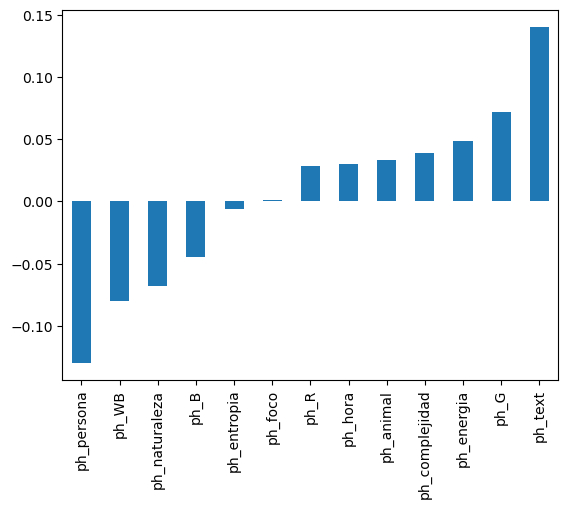

In [29]:
#vamos a poner la correlacion en un grafico, sin contar ph_likes
df1cv3.corr()['ph_likes'].sort_values()[:-2].plot(kind='bar')

In [30]:
#vamos a crear una funcion que haga todos los pasos que se han hecho anterioremente
def clean_data(df):
    df.drop(['pg_direccion', 'pg_nombre', 'pg_descripcion', 'pg_numero_de_publicaciones', 'pg_seguidos'], axis=1, inplace=True)
    df.drop(['ph_descripcion', 'ph_url', 'ph_nombre', 'ph_atributos', 'ph_numerado'], axis=1, inplace=True)
    df['ph_foco'] = (df['ph_foco'] - df['ph_foco'].min()) / (df['ph_foco'].max() - df['ph_foco'].min())
    df['ph_complejidad'] = df['ph_foco'] + df['ph_entropia'] + df['ph_energia']
    return df

In [42]:
cont = 1
while cont <= 11:
    if cont == 8:
        cont += 1
        pass
    else:
        df = pd.read_csv(f'../data/datos{cont}_cleanRGBCV3.csv')
        df = clean_data(df)
        df.to_csv(f'../data/datos{cont}_cleanRGBCV3_clean.csv', index=False)
        cont += 1

In [45]:
#cargamos todos los datos limpios en distintos dataframes
df1cv3_clean = pd.read_csv('../data/datos1_cleanRGBCV3_clean.csv')
df2cv3_clean = pd.read_csv('../data/datos2_cleanRGBCV3_clean.csv')
df3cv3_clean = pd.read_csv('../data/datos3_cleanRGBCV3_clean.csv')
df4cv3_clean = pd.read_csv('../data/datos4_cleanRGBCV3_clean.csv')
df5cv3_clean = pd.read_csv('../data/datos5_cleanRGBCV3_clean.csv')
df6cv3_clean = pd.read_csv('../data/datos6_cleanRGBCV3_clean.csv')
df7cv3_clean = pd.read_csv('../data/datos7_cleanRGBCV3_clean.csv')
df9cv3_clean = pd.read_csv('../data/datos9_cleanRGBCV3_clean.csv')
df10cv3_clean = pd.read_csv('../data/datos10_cleanRGBCV3_clean.csv')
df11cv3_clean = pd.read_csv('../data/datos11_cleanRGBCV3_clean.csv')



In [46]:
#sacamos las correlaciones de cada dataframe con ph_likes
corr1 = df1cv3_clean.corr()['ph_likes'].sort_values()
corr2 = df2cv3_clean.corr()['ph_likes'].sort_values()
corr3 = df3cv3_clean.corr()['ph_likes'].sort_values()
corr4 = df4cv3_clean.corr()['ph_likes'].sort_values()
corr5 = df5cv3_clean.corr()['ph_likes'].sort_values()
corr6 = df6cv3_clean.corr()['ph_likes'].sort_values()
corr7 = df7cv3_clean.corr()['ph_likes'].sort_values()
corr9 = df9cv3_clean.corr()['ph_likes'].sort_values()
corr10 = df10cv3_clean.corr()['ph_likes'].sort_values()
corr11 = df11cv3_clean.corr()['ph_likes'].sort_values()



<AxesSubplot:>

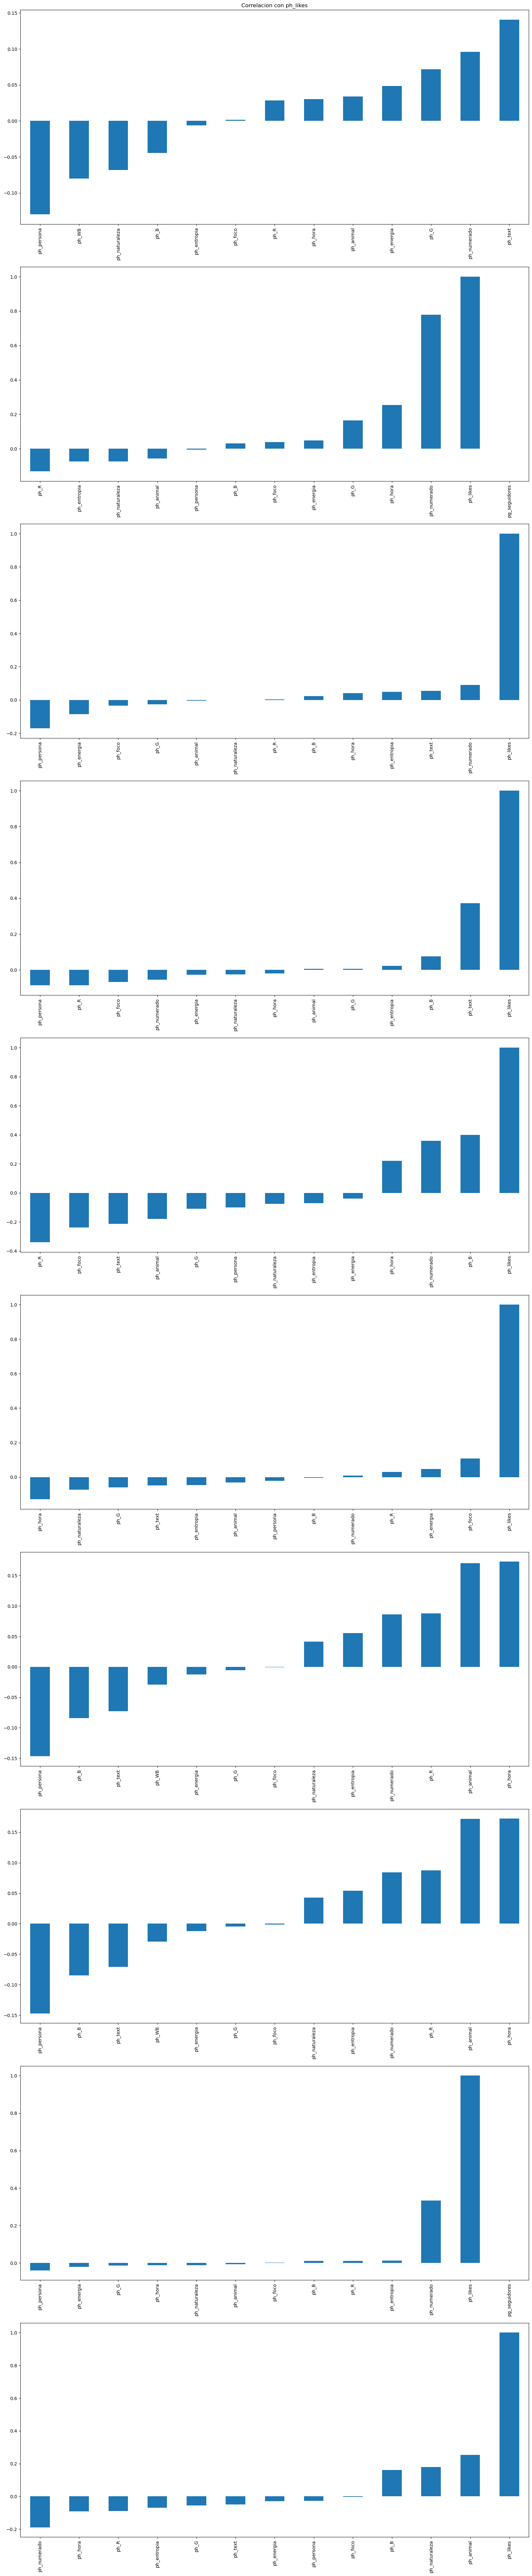

In [56]:
#vamos a ver todos los graficos de barras de correlacion juntos sin ph_seguidores
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(20, 100))
axes[0].set_title('Correlacion con ph_likes')
corr1[:-2].plot(kind='bar', ax=axes[0])
corr2[:-2].plot(kind='bar', ax=axes[1])
corr3[:-2].plot(kind='bar', ax=axes[2])
corr4[:-2].plot(kind='bar', ax=axes[3])
corr5[:-2].plot(kind='bar', ax=axes[4])
corr6[:-2].plot(kind='bar', ax=axes[5])
corr7[:-2].plot(kind='bar', ax=axes[6])
corr9[:-2].plot(kind='bar', ax=axes[7])
corr10[:-2].plot(kind='bar', ax=axes[8])
corr11[:-2].plot(kind='bar', ax=axes[9])





In [49]:
corr3

ph_persona      -0.170497
ph_energia      -0.085984
ph_foco         -0.033214
ph_G            -0.026592
ph_animal       -0.004021
ph_naturaleza    0.000143
ph_R             0.003259
ph_B             0.023028
ph_hora          0.040676
ph_entropia      0.048261
ph_text          0.054551
ph_numerado      0.091082
ph_likes         1.000000
pg_seguidores         NaN
ph_WB                 NaN
Name: ph_likes, dtype: float64